In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [12]:
train = pd.read_csv("data/dacon_abalon/train.csv")
test = pd.read_csv("data/dacon_abalon/test.csv")

In [15]:
train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [13]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


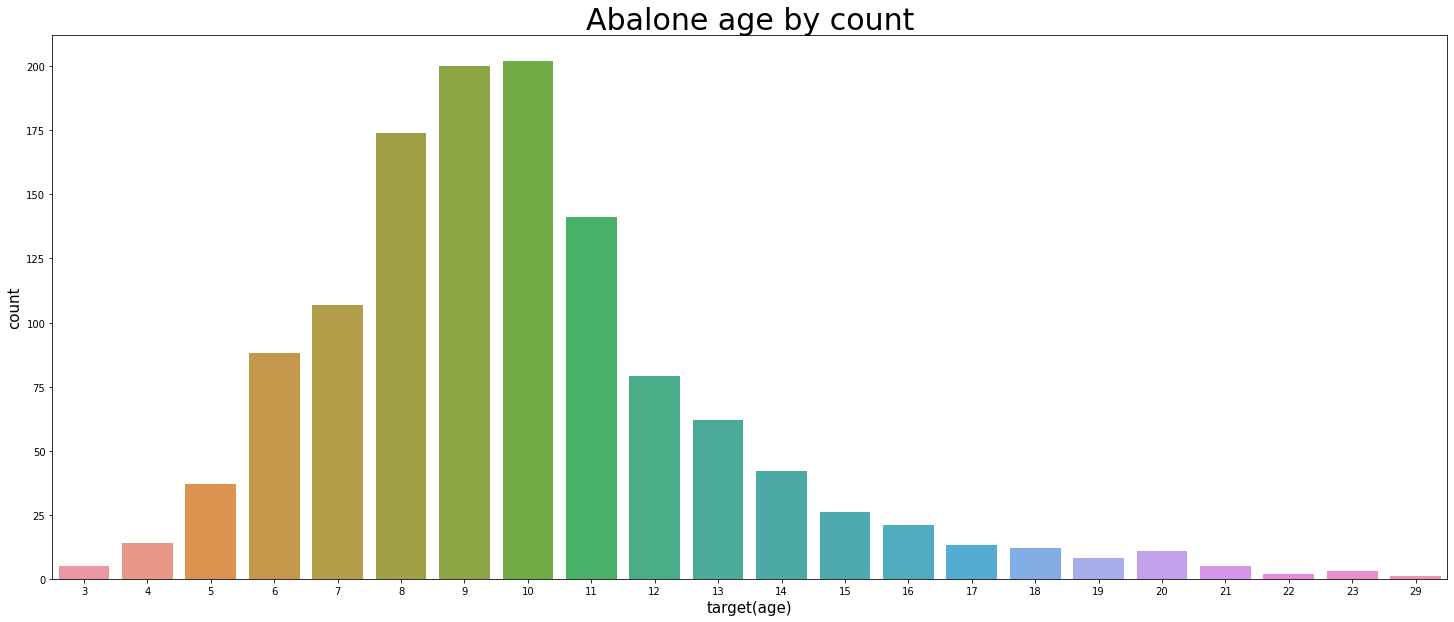

In [14]:
train = train.drop(columns=['id'],axis=1) # id 열을 제거해 줍니다.

temp = train['Target'].unique() # Target의 중복되지 않은 값을 출력합니다.
np.sort(temp) # 오름차순으로 정렬합니다.

train.groupby('Target').count().iloc[:,0] # Target 값 별로 데이터의 개수를 세어줍니다.

# 전복의 나이 분포 시각화
plt.rcParams['figure.figsize'] = [25,10]
sns.countplot('Target' , data=train)
plt.title('Abalone age by count', fontsize=30)
plt.xlabel('target(age)', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

In [24]:
# train.groupby

# train['Target'].groupby(abalone['sex'])
train.head()


,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [46]:
# # train.groupby

train_grouped = train.groupby(['Gender', 'Target'], as_index=False).size()

In [65]:
train.Gender.value_counts()

M    469
I    404
F    380
Name: Gender, dtype: int64

In [52]:
train_grouped.head()

,Gender,Target,size
0,F,5,1
1,F,6,5
2,F,7,15
3,F,8,30
4,F,9,65


/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


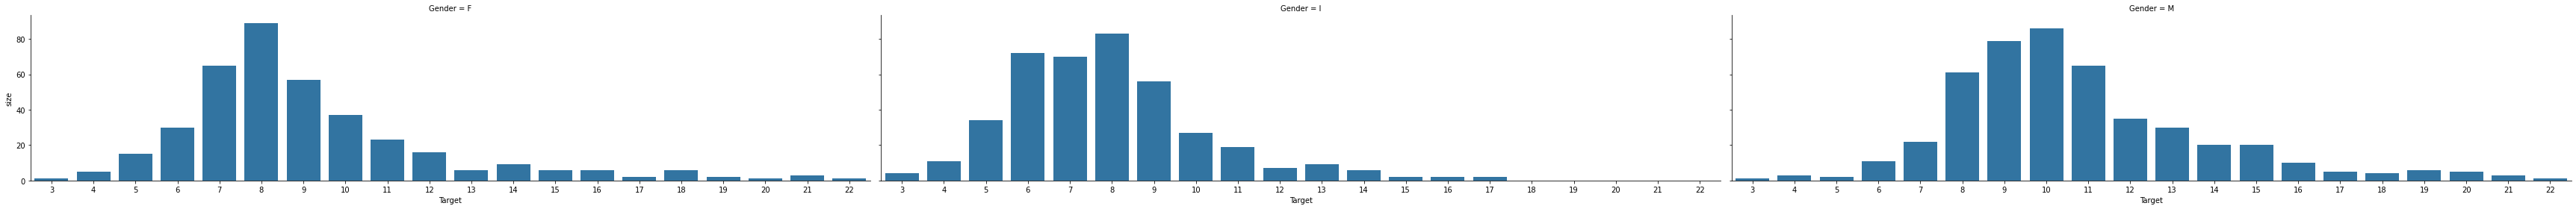

In [64]:
g = sns.FacetGrid(train_grouped, col="Gender", # hue="segment",
                  palette="Set3", size=4, aspect=2)
g.map(sns.barplot,'Target','size')

<AxesSubplot:xlabel='Target', ylabel='size'>

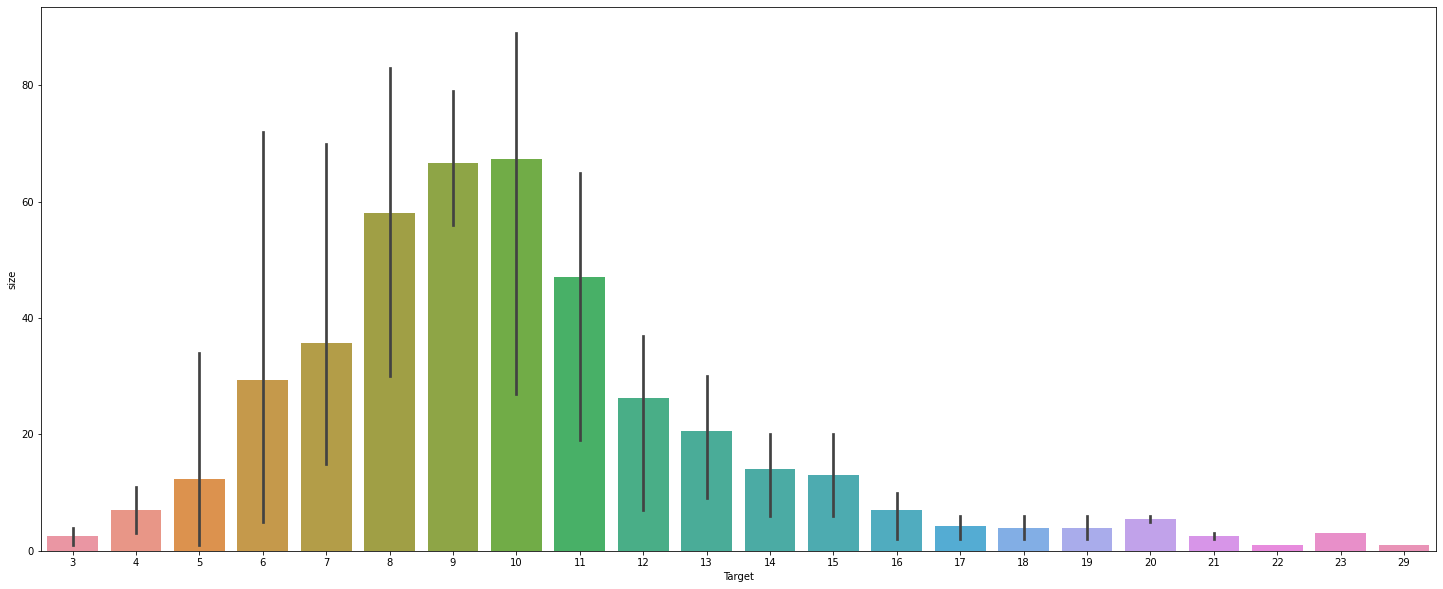

In [57]:
sns.barplot(x= 'Target', y = 'size' , data=train_grouped)

In [51]:
gg = sns.FacetGrid(train_grouped, col = "size", row = "Target")
# sns.countplot.FacetGrid('Target' , data=train)

# gg.map(sns.barplot, 'Gender')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fa66d1c85e0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
gg